In [4]:
foo = 0.09
foo *= 10
print(int(foo))
print(foo)

unique_tokens = [u'\n', u'\r', u'!', u' ', u'"', u"'", u')', u'(', u'-', u',', u'.', u';', 
                 u':', u'=', u'?', u'>', u'[', u']', u'_', u'a', u'c', u'b', u'e', u'd', u'g',
                 u'f', u'i', u'h', u'k', u'j', u'm', u'l', u'o', u'n', u'q', u'p', u's', u'r',
                 u'u', u't', u'w', u'v', u'y', u'x', u'z']


0
0.9


<IPython.core.display.Javascript object>


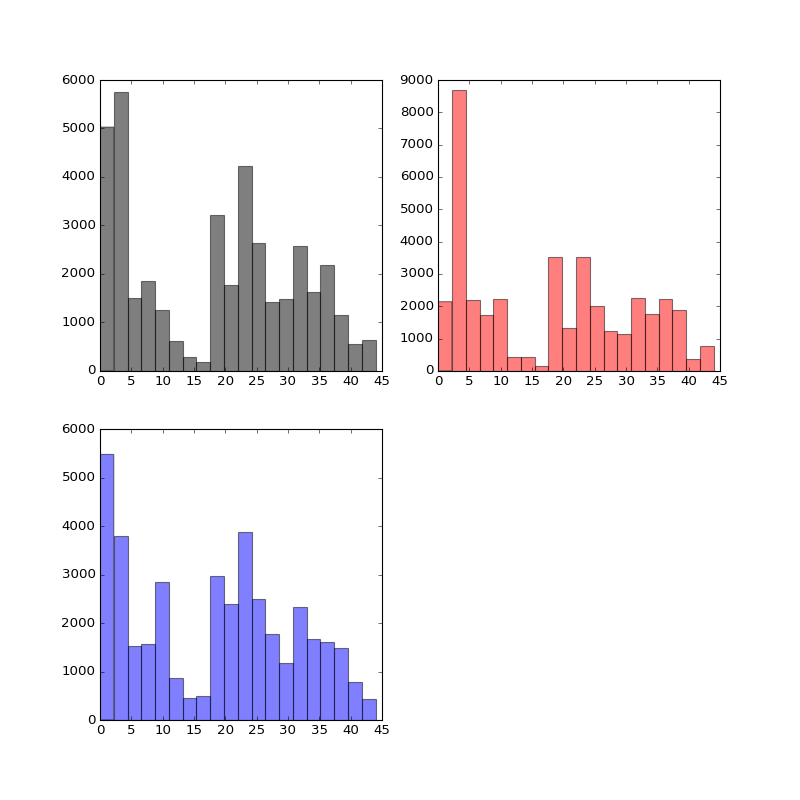

(40000, 3)
(40000, 3)


In [8]:
%matplotlib notebook
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

f = h5py.File('distr.hdf5')
distr = f['flatchain'][...]

probs = f['probs'][...]
cond1 = distr < 45
cond2 = distr >= 0
cond_tot = np.logical_and(cond1, cond2)

inrange_indices = np.all(cond_tot,axis=1)
distr_inrange = distr[inrange_indices]
print(distr.shape)
print(distr_inrange.shape)
colors = ['k','r','b']
axs = [ax1, ax2, ax3]
for i in xrange(3):
    axs[i].hist(distr_inrange[:,i],20,color=colors[i],alpha=0.5)
    axs[i].set_xlim([0,45])


In [1]:
def find_sublist(sublist,biglist):
    """
    Find occurances of sublist in biglist 
    """
    indices = []
    matches = []
    n = len(sublist)
    for i in xrange(len(biglist) - n):
        if biglist[i:i+n] == sublist:
            indices.append(i)
            matches.append(biglist[i+n])
        else:
            continue
    unique_matches = list(set(matches))
    n_matches = len(matches)
    freq = [float(matches.count(unique))/n_matches for unique in unique_matches]
    return {
        'matches':matches,
        'unique_matches':unique_matches,
        'freq':freq
    }
# print(master_tokens)
foo = list('the')
foo = find_sublist(['t','h'],master_tokens)
freq = foo['freq']
unique_matches = foo['unique_matches']
choice = np.random.choice(len(freq),1,p=freq)
print(unique_matches[choice[0]])

NameError: name 'master_tokens' is not defined

In [47]:
import bayes_network
from scipy.interpolate import interp1d
reload(bayes_network)
import numpy as np 
m = interp1d([0,100],[0,1])
bn = bayes_network.BayesNetwork('texts/AustenPride.txt','char')
bn.map_domain([0,49,40])
f = h5py.File('distr.hdf5')
distr = f['flatchain'][...]
probs = f['probs'][...]
cond1 = distr < 1 
cond2 = distr >= 0
cond_tot = np.logical_and(cond1, cond2)

inrange_indices = np.all(cond_tot,axis=1)
distr_inrange = distr[inrange_indices]

for i in xrange(distr_inrange.shape[0]):
    print(bn(distr_inrange[i,:]))


Took 0.0029 seconds to generate master string
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
4.26209618415e-06
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
4.83037567536e-05
4.83037567536e-05
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-i

In [20]:
bn([0.1,0.2,0.1])

-inf

In [14]:
import emcee

nwalkers = 250 
ndim = 3
p0 = np.random.randn(ndim*nwalkers).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob)
pos, prob, state = sampler.run_mcmc(p0, 1000)
sampler.reset()

emcee: Exception while calling your likelihood function:
  params: [ 0.85190266  0.93223084 -0.05959123]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/dean/python-envs/webenv/local/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-12-43834fbf2c89>", line 4, in <lambda>
    lnprob = lambda pos: np.log(bn.obs_prob(pos))
  File "bayes_network.py", line 39, in obs_prob
    reduced_biglist_indices = [i for i in xrange(len_big) if biglist[i] == target_chars[0]]
UnboundLocalError: local variable 'target_chars' referenced before assignment


UnboundLocalError: local variable 'target_chars' referenced before assignment